# Lead Scoring Case Study

#### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


#### Goal

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
leads = pd.read_csv("C:/Users/FlorenceB/Downloads/Leads.csv")
leads.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1. Data Cleaning

In [7]:
# checking for sum of duplicate values in Prospect ID 

sum(leads.duplicated(subset='Prospect ID'))==0

True

In [8]:
# checking for sum of duplicate values in Lead Number 

sum(leads.duplicated(subset='Lead Number'))==0

True

Since the values in 'Prospect ID'  and 'Lead Number' are unique ID of the customers, they can be dropped

In [9]:
# dropping Prospect ID and Lead Number 
leads.drop(['Prospect ID','Lead Number'], 1, inplace = True)

#### Handling 'Select' level that is present in many categorical variables. Since it means no option was selected we can replace it with NaN


In [11]:
# Converting 'Select' values to NaN
leads = leads.replace('Select', np.nan)

#### Handling columns with high percentage of missing values

In [15]:
# checking percentage of null values in each column 
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [17]:
# Dropping columns with 45% or more missing values 
cols = leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >=45):
        leads.drop(i, 1, inplace=True)

In [18]:
# checking percentage of null values in each column again
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Categorical columns analysis

#### Country column 

In [21]:
# checking value counts of column 'Country' including null values
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

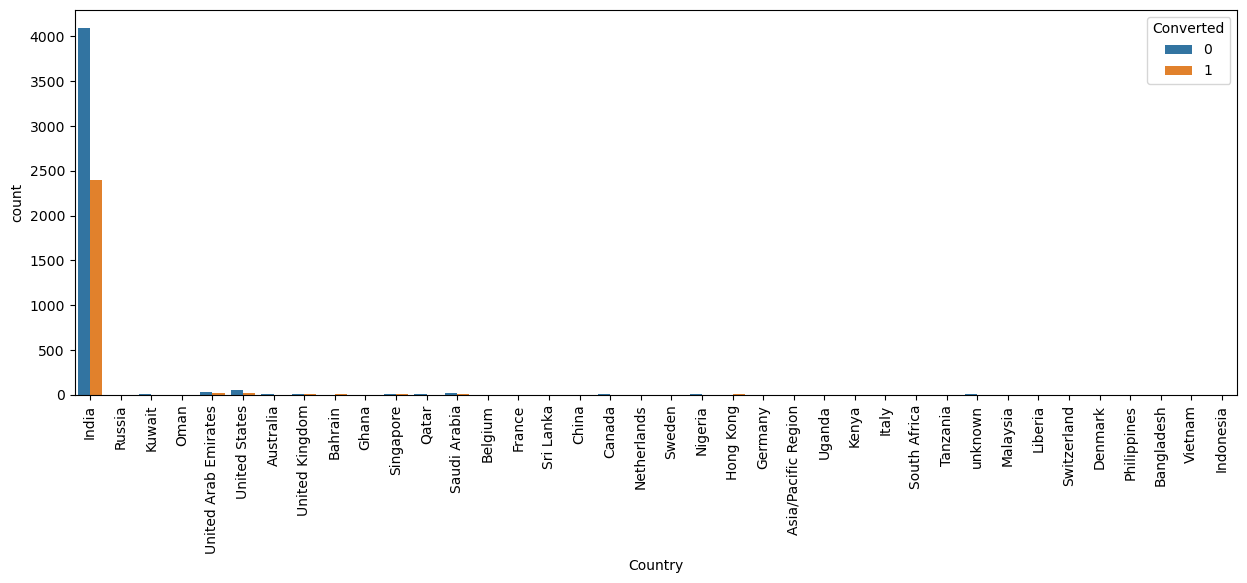

In [25]:
# plotting spread of Country column 
plt.figure(figsize=(15, 5))
sns.countplot(data=leads, x='Country', hue='Converted')
plt.xticks(rotation=90) 
plt.show()

#### City column

In [26]:
# checking value counts of column 'City' including null values
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
# replacing null values with mode of City:'Mumbai'
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

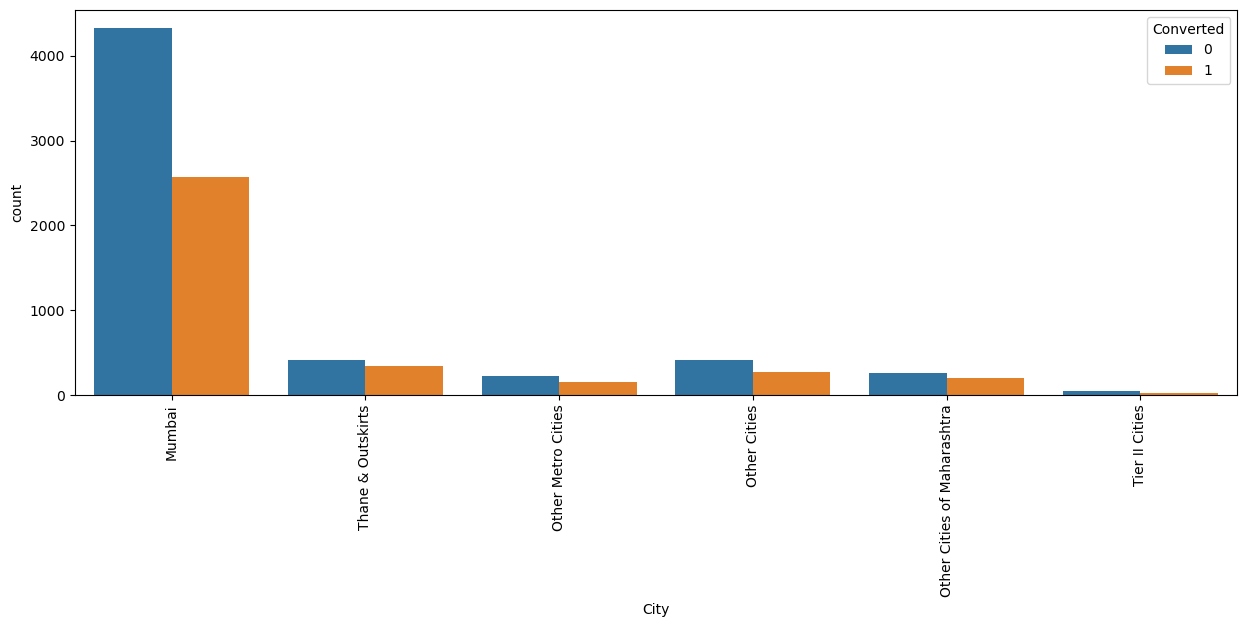

In [59]:
# plotting spread of City column after replacement of null values 
plt.figure(figsize=(15, 5))
sns.countplot(data=leads, x='City', hue='Converted')
plt.xticks(rotation=90) 
plt.show()

#### Specialization column

In [29]:
#checking value counts of Specialization column including null values
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

As you can see the highest number is the null values, that can be because the lead might have not found their specialisation in the list given or the lead could have been a student

In [30]:
#replacing NaN values with 'Not Specified'
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

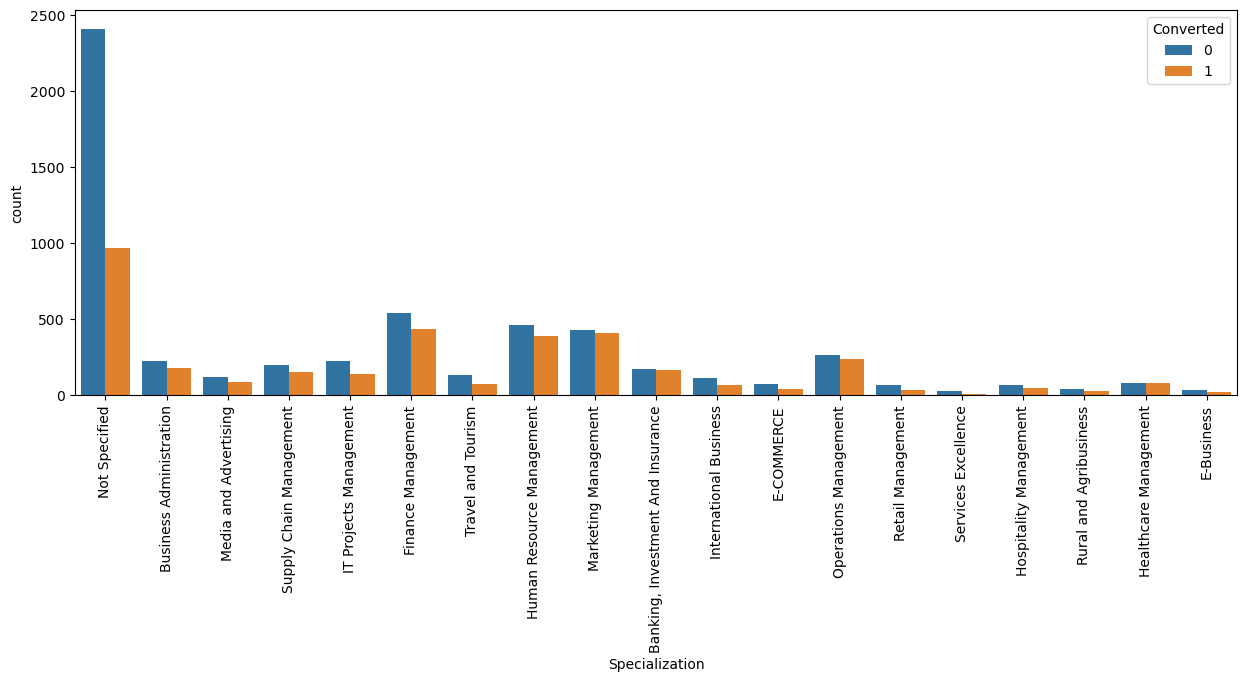

In [31]:
# plotting spread of Specialization column after replacement of null values 
plt.figure(figsize=(15, 5))
sns.countplot(data=leads, x='Specialization', hue='Converted')
plt.xticks(rotation=90) 
plt.show()

From the graph, it is evident that there are higher number of leads and leads converted in the Management specializations. So why dont we combine them?

In [32]:
#combining Management Specializations 

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

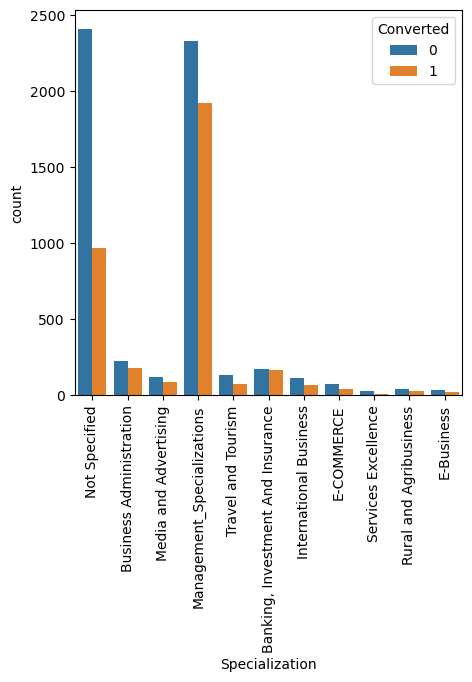

In [45]:
# plotting spread of Specialization column after combining Management Specializations 
plt.figure(figsize=(5, 5))
sns.countplot(data=leads, x='Specialization', hue='Converted')
plt.xticks(rotation=90) 
plt.show()

#### 'What is your current occupation' column

In [35]:
#checking value counts on 'What is your current occupation' including null values
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [36]:
#replacing null values with mode of 'What is your current occupation': Unemployed

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

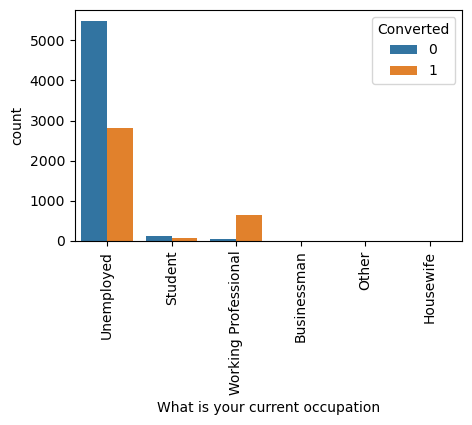

In [44]:
# plotting spread of 'What is your current occupation' column after replacing
plt.figure(figsize=(5, 3))
sns.countplot(data=leads, x='What is your current occupation', hue='Converted')
plt.xticks(rotation=90) 
plt.show()

As you can see from the plot, working professionals as leads are being sucessfully converted

#### 'What matters most to you in choosing a course' column

In [46]:
#checking value counts on 'What matters most to you in choosing a course' including null values
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [47]:
#replacing null values with mode of 'What matters most to you in choosing a course': Better Career Prospects 
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

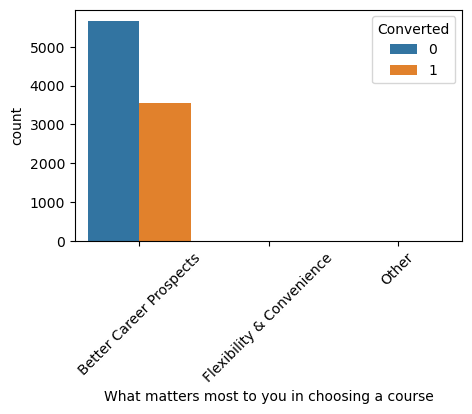

In [50]:
# plotting spread of 'What matters most to you in choosing a course' column after replacing
plt.figure(figsize=(5, 3))
sns.countplot(data=leads, x='What matters most to you in choosing a course', hue='Converted')
plt.xticks(rotation=45) 
plt.show()

Since Majority of the data is better career prospects, we can drop this column.

#### Tags column

In [51]:
#checking value counts on 'Tags' including null values
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [52]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

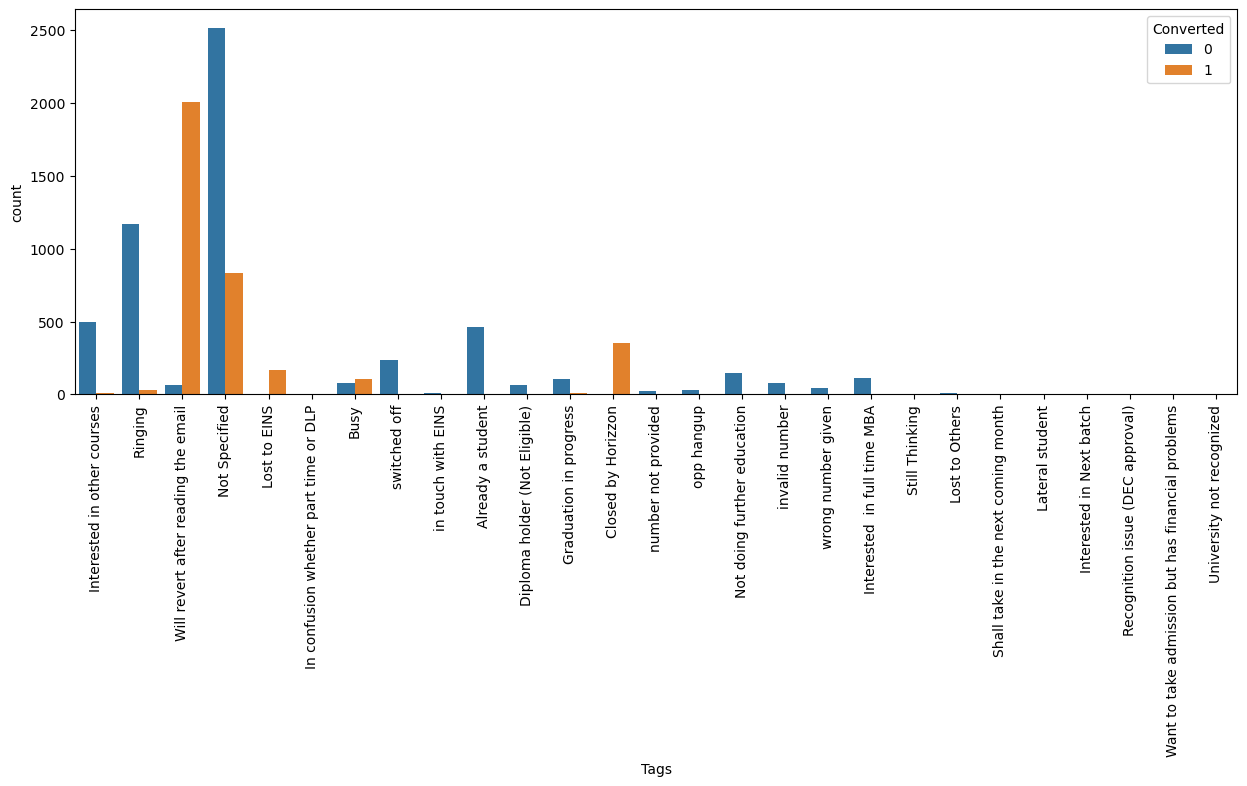

In [53]:
# plotting spread of 'Tags' column after replacing
plt.figure(figsize=(15, 5))
sns.countplot(data=leads, x='Tags', hue='Converted')
plt.xticks(rotation=90) 
plt.show()

In [56]:
#Combining tags with low frequency as Other_tags
leads['Tags'] = leads['Tags'].replace(['Recognition issue (DEC approval)','University not recognized','Shall take in the next coming month','Lateral student','Interested in Next batch','In confusion whether part time or DLP','Want to take admission but has financial problems','Still Thinking','Lost to Others','in touch with EINS','number not provided','opp hangup','wrong number given','Diploma holder (Not Eligible)','invalid number','Graduation in progress','Interested  in full time MBA','Not doing further education','Already a student','switched off'],'Other_tags')

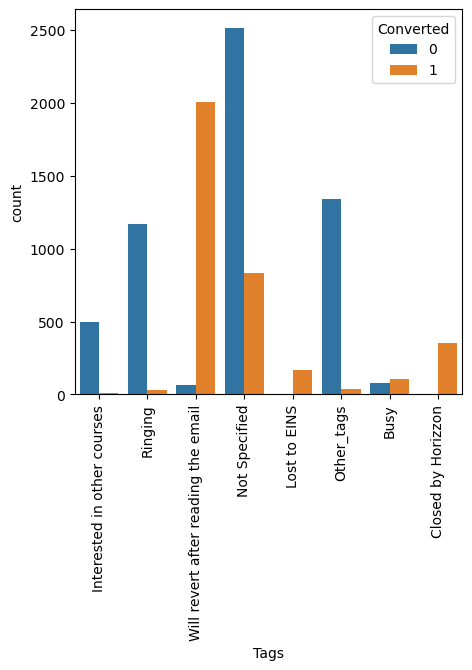

In [60]:
# plotting spread of 'Tags' column after combining
plt.figure(figsize=(5, 5))
sns.countplot(data=leads, x='Tags', hue='Converted')
plt.xticks(rotation=90) 
plt.show()

#### Lead Source column

In [61]:
#checking value counts on 'Lead Source' including null values
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [62]:
#replacing Nan Values and low frequency values with 'Others'
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others') 

In [63]:
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')

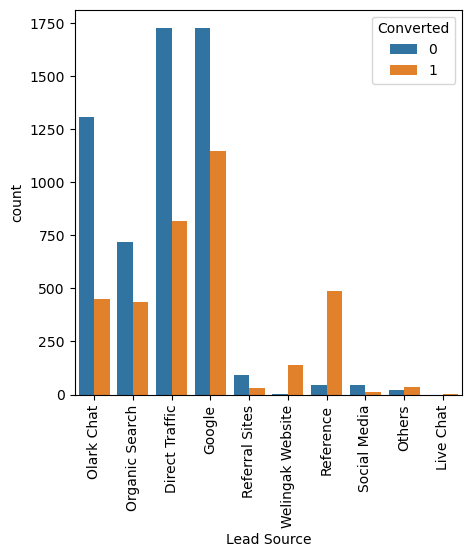

In [64]:
# plotting spread of 'Lead Source' column after replacing
plt.figure(figsize=(5, 5))
sns.countplot(data=leads, x='Lead Source', hue='Converted')
plt.xticks(rotation=90) 
plt.show()

As you can see from the plot, 
- Direct Traffic and Google bring the highest leads. 
- Conversion rate of reference leads and welingak website leads are high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, 
  organic search,direct traffic and google leads
- Generate more leads from reference and welingak website.

#### Last Activity column

In [66]:
#checking value counts on 'Last Activity' including null values
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [67]:
#replacing Nan Values and low frequency values with 'Others'
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [68]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

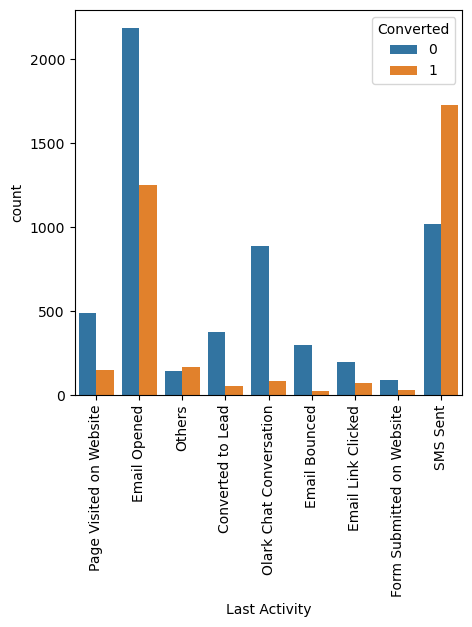

In [69]:
# plotting spread of 'Last Activity' column after replacing
plt.figure(figsize=(5, 5))
sns.countplot(data=leads, x='Last Activity', hue='Converted')
plt.xticks(rotation=90) 
plt.show()

In [70]:
#Checking the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [71]:
#dropping all rows which have null values
leads = leads.dropna()

In [72]:
#Checking percentage of Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

#### Lead Origin column

In [74]:
#checking value counts on 'Lead Origin' 
leads['Lead Origin'].value_counts()

Landing Page Submission    4850
API                        1902
Lead Add Form                27
Name: Lead Origin, dtype: int64

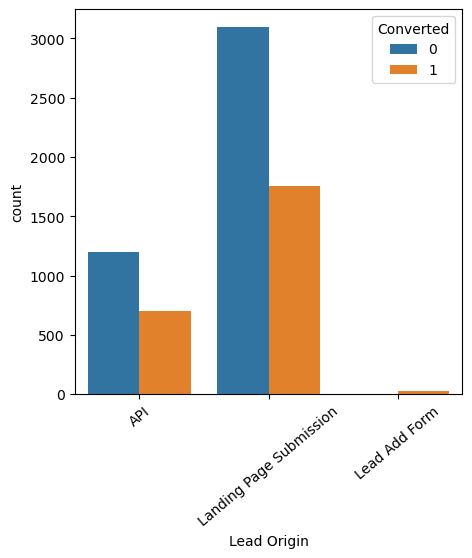

In [77]:
# plotting spread of 'Lead Origin' column 
plt.figure(figsize=(5, 5))
sns.countplot(data=leads, x='Lead Origin', hue='Converted')
plt.xticks(rotation=40) 
plt.show()

Conversion rate of leads from API and Landing Page submission seems to be lesser than the number of leads they land. This should be improved.

#### Do not Email column

In [79]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

No     6186
Yes     593
Name: Do Not Email, dtype: int64

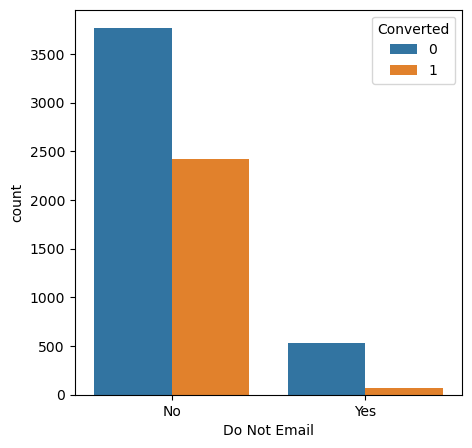

In [81]:
# plotting spread of 'Do Not Email' column 
plt.figure(figsize=(5, 5))
sns.countplot(data=leads, x='Do Not Email', hue='Converted')
plt.show()

#### Do Not Call column

In [82]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

No     6778
Yes       1
Name: Do Not Call, dtype: int64

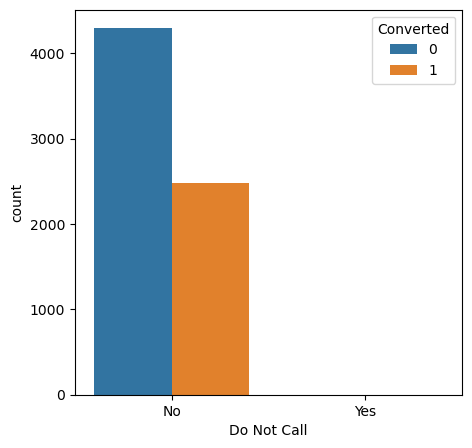

In [83]:
# plotting spread of 'Do Not Call' column 
plt.figure(figsize=(5, 5))
sns.countplot(data=leads, x='Do Not Call', hue='Converted')
plt.show()

We can drop 'Do not call' column as more than 90% has only one value

#### Checking for value counts in the following columns:

In [84]:
leads.Search.value_counts(dropna=False)

No     6765
Yes      14
Name: Search, dtype: int64

In [85]:
leads.Magazine.value_counts(dropna=False)

No    6779
Name: Magazine, dtype: int64

In [86]:
leads['Newspaper Article'].value_counts(dropna=False)

No     6777
Yes       2
Name: Newspaper Article, dtype: int64

In [87]:
leads['X Education Forums'].value_counts(dropna=False)

No     6778
Yes       1
Name: X Education Forums, dtype: int64

In [88]:
leads['Newspaper'].value_counts(dropna=False)

No     6778
Yes       1
Name: Newspaper, dtype: int64

In [89]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     6775
Yes       4
Name: Digital Advertisement, dtype: int64

In [90]:
leads['Through Recommendations'].value_counts(dropna=False)

No     6772
Yes       7
Name: Through Recommendations, dtype: int64

In [91]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    6779
Name: Receive More Updates About Our Courses, dtype: int64

In [92]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    6779
Name: Update me on Supply Chain Content, dtype: int64

In [93]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    6779
Name: Get updates on DM Content, dtype: int64

In [94]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    6779
Name: I agree to pay the amount through cheque, dtype: int64

In [95]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     3913
Yes    2866
Name: A free copy of Mastering The Interview, dtype: int64

In [96]:
# Listing the columns to drop since there is not much variance in data in those columns
cols_to_drop = ['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [97]:
#dropping columns
leads = leads.drop(cols_to_drop,1)

In [98]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 1 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6779 non-null   object 
 1   Lead Source                             6779 non-null   object 
 2   Do Not Email                            6779 non-null   object 
 3   Converted                               6779 non-null   int64  
 4   TotalVisits                             6779 non-null   float64
 5   Total Time Spent on Website             6779 non-null   int64  
 6   Page Views Per Visit                    6779 non-null   float64
 7   Last Activity                           6779 non-null   object 
 8   Specialization                          6779 non-null   object 
 9   What is your current occupation         6779 non-null   object 
 10  Tags                                    6779 non-null   obje

#### Last Notable Activity column


In [99]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        2331
Email Opened                    2212
SMS Sent                        1643
Page Visited on Website          286
Email Link Clicked               106
Olark Chat Conversation           68
Email Bounced                     48
Unsubscribed                      40
Unreachable                       26
Had a Phone Conversation          14
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

In [100]:
# Replacing lower frequency values with 'Other Notable activity'

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                         'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                         'View in browser link Clicked',
                                                                         'Approached upfront', 
                                                                         'Form Submitted on Website', 
                                                                         'Email Received'],'Other Notable activity')

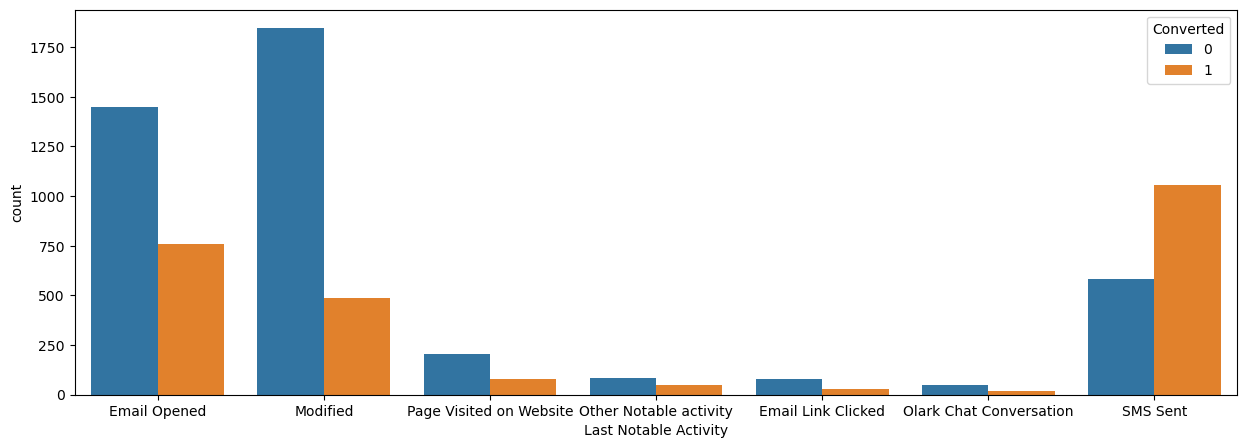

In [102]:
# plotting spread of 'Last Notable Activity' column after replacing
plt.figure(figsize=(15, 5))
sns.countplot(data=leads, x='Last Notable Activity', hue='Converted')
plt.show()

### Numerical variables analysis

In [103]:
# Checking the percent of data that has converted value as 1 in the 'Converted' column
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

36.65732408909869

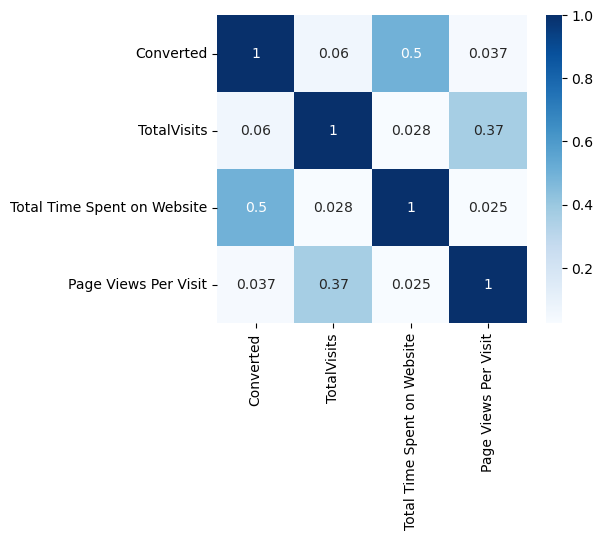

In [108]:
#Checking correlations of numeric values by plotting heatmap
plt.figure(figsize=(5,4))
sns.heatmap(leads.corr(), cmap="Blues", annot=True)
plt.show()

- As you can see from the heatmap, the highest correlation with Converted is with 'Total Time Spent on Website' 

#### Total Visits column

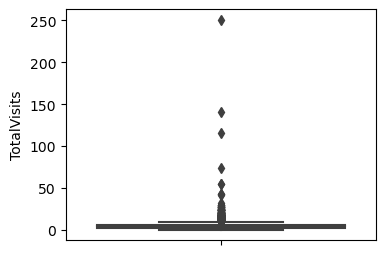

In [110]:
# Visualising the spread of variable 'Total visits'
plt.figure(figsize=(4,3))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

- There are outliers present

In [111]:
#checking percentile values for "Total Visits"
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6779.000000
mean        4.553917
std         5.138148
min         0.000000
5%          1.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.220000
max       251.000000
Name: TotalVisits, dtype: float64

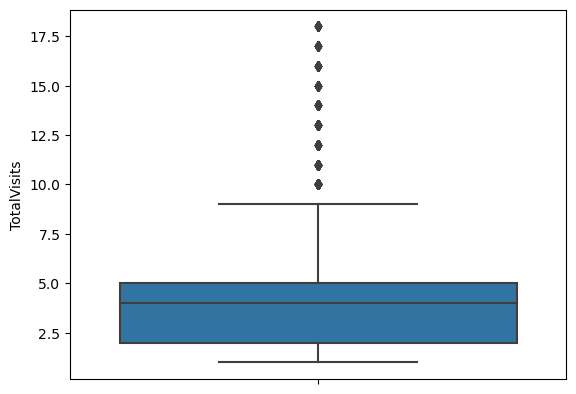

In [112]:
#Outlier Treatment: Removing top & bottom 1% of the Column Outlier values
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [113]:
leads.shape

(6706, 14)

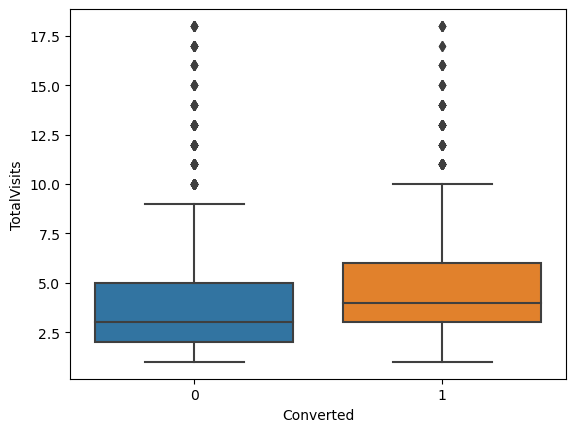

In [121]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

- Nothing conclusive can be said when it comes to relation with Total Visits and leads being converted 

#### Total Time Spent on Website column

In [114]:
#checking percentiles values for "Total Time Spent on Website"
leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6706.000000
mean      631.736206
std       541.763382
min         0.000000
5%         33.000000
25%       171.000000
50%       397.000000
75%      1104.000000
90%      1451.500000
95%      1606.000000
99%      1862.950000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

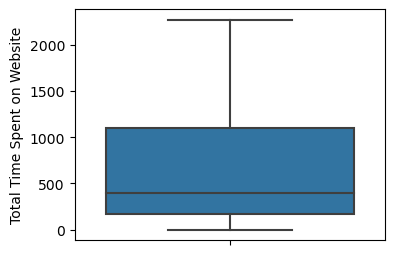

In [115]:
#visualizing spread of variable 'Total Time Spent on Website'
plt.figure(figsize=(4,3))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

- As you can see from the plot, no outlier treatment required

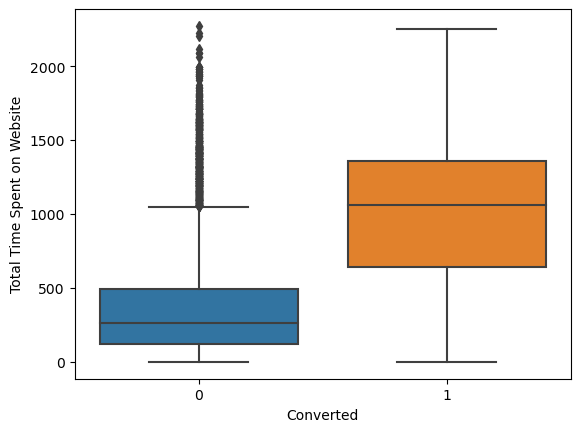

In [123]:
#checking Spread of "Total Time Spent on Website" vs Converted variable
sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

- The more time they spend on the website, higher the chances of leads being converted
- Hence, the website needs to be more engaging for higher chances of conversion

#### Page Views Per Visit column

In [118]:
#checking percentiles values for "Page Views Per Visit"
leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6706.000000
mean        3.104545
std         1.817244
min         1.000000
5%          1.000000
25%         2.000000
50%         3.000000
75%         4.000000
90%         5.000000
95%         6.500000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

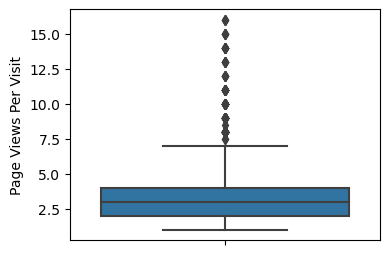

In [117]:
#visualizing spread of variable "Page Views Per Visit"
plt.figure(figsize=(4,3))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

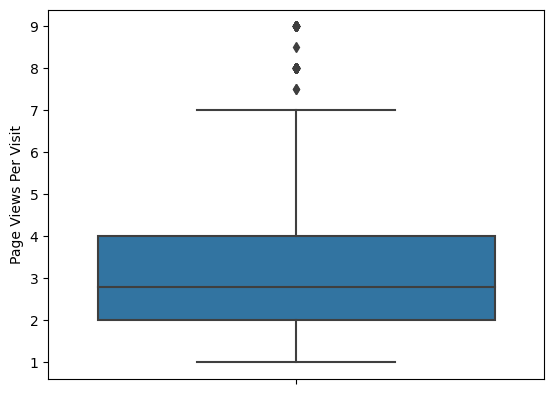

In [119]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [120]:
leads.shape

(6640, 14)

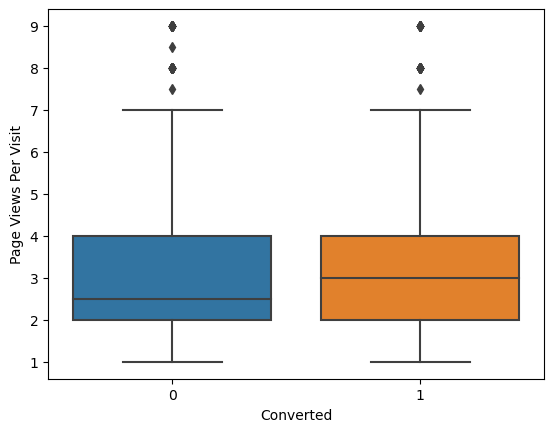

In [124]:
#checking Spread of "Page Views Per Visit" vs Converted variable
sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

- Nothing conclusive can be said for lead conversions from Page Views Per Visit 

In [125]:
#checking missing values in leftover columns/
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### Creation of dummy variable

In [126]:
# Making a list of categorical columns 
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [127]:
# Listing variables to map
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
leads[varlist] = leads[varlist].apply(binary_map)

In [128]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation','City']], drop_first=True)
leads = pd.concat([leads,dummy],1)

In [129]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [130]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [131]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [133]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other Notable activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [134]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [135]:
#dropping the original columns after dummy variable creation
leads.drop(cat_cols,1,inplace = True)

In [136]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,1,2.0,1640,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Train-Test Split and Logistic Regression Model Building

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
# Putting response variable to y
y = leads['Converted']
y.head()

X=leads.drop('Converted', axis=1)

In [139]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [140]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 1979 to 7849
Data columns (total 54 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           4648 non-null   float64
 1   Total Time Spent on Website                           4648 non-null   int64  
 2   Page Views Per Visit                                  4648 non-null   float64
 3   Lead Origin_Landing Page Submission                   4648 non-null   uint8  
 4   Lead Origin_Lead Add Form                             4648 non-null   uint8  
 5   What is your current occupation_Housewife             4648 non-null   uint8  
 6   What is your current occupation_Other                 4648 non-null   uint8  
 7   What is your current occupation_Student               4648 non-null   uint8  
 8   What is your current occupation_Unemployed            4

### Scaling 

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
#scaling numeric columns
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email
1979,0.668033,1.836717,1.846001,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6249,1.418399,1.230405,-0.225650,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5557,1.793583,1.857051,3.712353,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7865,1.793583,-0.645835,3.712353,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8491,-0.082334,0.086176,0.601766,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Model Building using Stats Model & RFE

In [143]:
import statsmodels.api as sm

In [146]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [151]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [152]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True])

In [153]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('What is your current occupation_Housewife', False, 27),
 ('What is your current occupation_Other', False, 32),
 ('What is your current occupation_Student', False, 17),
 ('What is your current occupation_Unemployed', False, 4),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 40),
 ('City_Other Cities of Maharashtra', False, 35),
 ('City_Other Metro Cities', False, 28),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 7),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-Business', False, 19),
 ('Specialization_E-COMMERCE', False, 9),
 ('Specialization_International Business', False, 39),
 ('Specialization_Management_Specia

In [154]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [155]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Org

In [156]:
# Assessing the models with Statsmodels
# Model Building 1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4632
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -873.41
Date:                Mon, 19 Feb 2024   Deviance:                       1746.8
Time:                        12:23:28   Pearson chi2:                 6.21e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4676      0.107    -13.703      0.000      -1.678      -1.258
Total Time Spent on Website                              1.1229      0.065     17.281      0.000       0.996       1.250
Lead Origin_Lead Add Form                               23.9666   4.01e+04      0.001      1.000   -7.85e+04    7.86e+04
What is your current occupation_Working Professional     1.3016      0.506      2.572      0.010       0.310       2.293
Last Activity_Converted to Lead                         -0.8961      0.359     -2.498      0.012      -1.599      -0.193
Last Activity_Email Bounced                             -1.6560      0.541     -3.062      0.002      -2.716      -0.596
Last Activity_Page Visited on Website                   -0.8274      0.277     -2.992      0.003      -1.369      -0.285
Last Notable Activity_Modified                          -0.4829      0.164     -2.943      0.003      -0.804      -0.161
Last Notable Activity_SMS Sent                           1.8894      0.157     12.048      0.000       1.582       2.197
Tags_Busy                                                0.9760      0.247      3.957      0.000       0.493       1.459
Tags_Closed by Horizzon                                 26.8976   1.82e+04      0.001      0.999   -3.56e+04    3.57e+04
Tags_Interested in other courses                        -2.1792      0.427     -5.104      0.000      -3.016      -1.342
Tags_Lost to EINS                                        5.1003      0.620      8.226      0.000       3.885       6.315
Tags_Other_tags                                         -2.4656      0.241    -10.241      0.000      -2.937      -1.994
Tags_Ringing                                            -3.3904      0.285    -11.909      0.000      -3.948      -2.832
Tags_Will revert after reading the email                 4.5943      0.232     19.839      0.000       4.140       5.048
========================================================================================================================
"""

- As you can see the p-value of Lead Origin_Lead Add Form is high, so let's drop it 

In [157]:
#dropping column with high p-value
col = col.drop('Lead Origin_Lead Add Form',1)

In [158]:
# Model Building 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4633
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -876.03
Date:                Mon, 19 Feb 2024   Deviance:                       1752.1
Time:                        12:28:15   Pearson chi2:                 6.22e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4565      0.107    -13.650      0.000      -1.666      -1.247
Total Time Spent on Website                              1.1256      0.065     17.333      0.000       0.998       1.253
What is your current occupation_Working Professional     1.2994      0.505      2.571      0.010       0.309       2.290
Last Activity_Converted to Lead                         -0.8890      0.358     -2.480      0.013      -1.591      -0.187
Last Activity_Email Bounced                             -1.6548      0.540     -3.062      0.002      -2.714      -0.595
Last Activity_Page Visited on Website                   -0.7755      0.272     -2.849      0.004      -1.309      -0.242
Last Notable Activity_Modified                          -0.4988      0.164     -3.045      0.002      -0.820      -0.178
Last Notable Activity_SMS Sent                           1.8808      0.157     12.006      0.000       1.574       2.188
Tags_Busy                                                0.9679      0.246      3.927      0.000       0.485       1.451
Tags_Closed by Horizzon                                 26.0114   1.13e+04      0.002      0.998   -2.21e+04    2.22e+04
Tags_Interested in other courses                        -2.1845      0.427     -5.116      0.000      -3.021      -1.348
Tags_Lost to EINS                                        5.0986      0.620      8.221      0.000       3.883       6.314
Tags_Other_tags                                         -2.4732      0.241    -10.275      0.000      -2.945      -2.001
Tags_Ringing                                            -3.3970      0.285    -11.933      0.000      -3.955      -2.839
Tags_Will revert after reading the email                 4.5870      0.231     19.820      0.000       4.133       5.041
========================================================================================================================
"""

- As you can see the p-value of Tags_Closed by Horizzon is high, so let's drop it 

In [159]:
#dropping column with high p-value
col = col.drop('Tags_Closed by Horizzon',1)

In [160]:
#Model Building 3
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4634
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1002.0
Date:                Mon, 19 Feb 2024   Deviance:                       2004.0
Time:                        12:45:57   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5848
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1852      0.097    -12.165      0.000      -1.376      -0.994
Total Time Spent on Website                              1.1275      0.060     18.689      0.000       1.009       1.246
What is your current occupation_Working Professional     2.5887      0.383      6.752      0.000       1.837       3.340
Last Activity_Converted to Lead                         -1.2933      0.342     -3.780      0.000      -1.964      -0.623
Last Activity_Email Bounced                             -1.8427      0.482     -3.819      0.000      -2.788      -0.897
Last Activity_Page Visited on Website                   -0.4957      0.219     -2.259      0.024      -0.926      -0.066
Last Notable Activity_Modified                          -0.2242      0.142     -1.581      0.114      -0.502       0.054
Last Notable Activity_SMS Sent                           1.7159      0.153     11.210      0.000       1.416       2.016
Tags_Busy                                                0.6781      0.241      2.818      0.005       0.207       1.150
Tags_Interested in other courses                        -2.7184      0.430     -6.322      0.000      -3.561      -1.876
Tags_Lost to EINS                                        4.7163      0.624      7.559      0.000       3.493       5.939
Tags_Other_tags                                         -2.7707      0.238    -11.655      0.000      -3.237      -2.305
Tags_Ringing                                            -3.6068      0.283    -12.725      0.000      -4.162      -3.051
Tags_Will revert after reading the email                 4.1923      0.224     18.680      0.000       3.752       4.632
========================================================================================================================
"""

- As you can see the p-value of Last Notable Activity_Modified is high, so let's drop it 

In [161]:
#dropping column with high p-value
col = col.drop('Last Notable Activity_Modified',1)

In [162]:
# Model Building 4
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4635
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1003.3
Date:                Mon, 19 Feb 2024   Deviance:                       2006.5
Time:                        12:48:11   Pearson chi2:                 6.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5846
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2716      0.082    -15.563      0.000      -1.432      -1.111
Total Time Spent on Website                              1.1247      0.060     18.673      0.000       1.007       1.243
What is your current occupation_Working Professional     2.6097      0.384      6.788      0.000       1.856       3.363
Last Activity_Converted to Lead                         -1.4313      0.331     -4.323      0.000      -2.080      -0.782
Last Activity_Email Bounced                             -1.9216      0.479     -4.011      0.000      -2.861      -0.983
Last Activity_Page Visited on Website                   -0.5171      0.219     -2.364      0.018      -0.946      -0.088
Last Notable Activity_SMS Sent                           1.8006      0.144     12.504      0.000       1.518       2.083
Tags_Busy                                                0.6753      0.241      2.803      0.005       0.203       1.148
Tags_Interested in other courses                        -2.7730      0.429     -6.461      0.000      -3.614      -1.932
Tags_Lost to EINS                                        4.6804      0.624      7.496      0.000       3.457       5.904
Tags_Other_tags                                         -2.7670      0.238    -11.633      0.000      -3.233      -2.301
Tags_Ringing                                            -3.5927      0.284    -12.671      0.000      -4.148      -3.037
Tags_Will revert after reading the email                 4.2091      0.224     18.793      0.000       3.770       4.648
========================================================================================================================
"""

- As you can see the p-value of Last Activity_Page Visited on Website is high, so let's drop it 

In [163]:
#dropping column with high p-value
col = col.drop('Last Activity_Page Visited on Website',1)

In [164]:
# Model Building 5
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4636
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1006.2
Date:                Mon, 19 Feb 2024   Deviance:                       2012.4
Time:                        12:50:33   Pearson chi2:                 6.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5841
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3342      0.078    -17.090      0.000      -1.487      -1.181
Total Time Spent on Website                              1.1176      0.060     18.646      0.000       1.000       1.235
What is your current occupation_Working Professional     2.5705      0.389      6.603      0.000       1.807       3.334
Last Activity_Converted to Lead                         -1.3744      0.331     -4.153      0.000      -2.023      -0.726
Last Activity_Email Bounced                             -1.8573      0.479     -3.878      0.000      -2.796      -0.919
Last Notable Activity_SMS Sent                           1.8629      0.142     13.130      0.000       1.585       2.141
Tags_Busy                                                0.6630      0.241      2.756      0.006       0.192       1.135
Tags_Interested in other courses                        -2.7372      0.427     -6.408      0.000      -3.574      -1.900
Tags_Lost to EINS                                        4.7141      0.623      7.561      0.000       3.492       5.936
Tags_Other_tags                                         -2.7626      0.237    -11.646      0.000      -3.228      -2.298
Tags_Ringing                                            -3.5794      0.283    -12.628      0.000      -4.135      -3.024
Tags_Will revert after reading the email                 4.2244      0.224     18.873      0.000       3.786       4.663
========================================================================================================================
"""

- As you can see the p-value of Tags_Busy is high, so let's drop it 

In [165]:
#dropping column with high p-value
col = col.drop('Tags_Busy',1)

In [166]:
# Model Building 6 
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4637
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1010.0
Date:                Mon, 19 Feb 2024   Deviance:                       2020.0
Time:                        12:53:03   Pearson chi2:                 6.91e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2907      0.076    -17.010      0.000      -1.439      -1.142
Total Time Spent on Website                              1.1140      0.060     18.673      0.000       0.997       1.231
What is your current occupation_Working Professional     2.5490      0.391      6.520      0.000       1.783       3.315
Last Activity_Converted to Lead                         -1.3894      0.330     -4.211      0.000      -2.036      -0.743
Last Activity_Email Bounced                             -1.8856      0.477     -3.953      0.000      -2.821      -0.951
Last Notable Activity_SMS Sent                           1.9213      0.141     13.639      0.000       1.645       2.197
Tags_Interested in other courses                        -2.7810      0.427     -6.512      0.000      -3.618      -1.944
Tags_Lost to EINS                                        4.6742      0.623      7.497      0.000       3.452       5.896
Tags_Other_tags                                         -2.8286      0.237    -11.956      0.000      -3.292      -2.365
Tags_Ringing                                            -3.6596      0.283    -12.941      0.000      -4.214      -3.105
Tags_Will revert after reading the email                 4.1764      0.223     18.712      0.000       3.739       4.614
========================================================================================================================
"""

- Since all the p-values are not high, let's check check the VIF to see if there is any correlation between the variables

In [167]:
# Checking for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [168]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,1.59
4,Last Notable Activity_SMS Sent,1.38
1,What is your current occupation_Working Profes...,1.26
0,Total Time Spent on Website,1.16
7,Tags_Other_tags,1.11
8,Tags_Ringing,1.11
2,Last Activity_Converted to Lead,1.07
3,Last Activity_Email Bounced,1.04
5,Tags_Interested in other courses,1.03
6,Tags_Lost to EINS,1.01


In [169]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1979    0.935633
6249    0.519975
5557    0.113992
7865    0.003437
8491    0.007735
2573    0.131868
474     0.024910
4477    0.972852
1952    0.072865
1816    0.000739
dtype: float64

In [170]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.35632849e-01, 5.19975073e-01, 1.13991916e-01, 3.43695224e-03,
       7.73465966e-03, 1.31867572e-01, 2.49103360e-02, 9.72851784e-01,
       7.28647705e-02, 7.39024107e-04])

In [171]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.935633,1979
1,0,0.519975,6249
2,0,0.113992,5557
3,0,0.003437,7865
4,0,0.007735,8491


In [172]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the dataframe
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.935633,1979,1
1,0,0.519975,6249,1
2,0,0.113992,5557,0
3,0,0.003437,7865,0
4,0,0.007735,8491,0


In [173]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2807  154]
 [ 263 1424]]


In [174]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9102839931153184


In [175]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [176]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8441019561351512

In [177]:
# calculating specificity
TN / float(TN+FP)

0.9479905437352246

In [178]:
# Calculating False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.05200945626477541


In [179]:
# positive predictive value 
print (TP / float(TP+FP))

0.9024081115335868


In [180]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9143322475570033


### ROC Curve

In [181]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [182]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

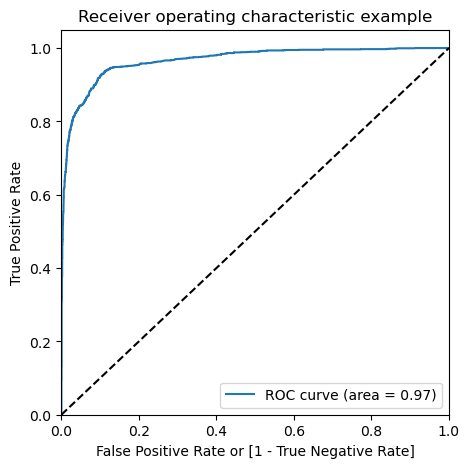

In [183]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- This indicates a good predictive model with a value of 0.97. The ROC Curve should be a value close to 1.

#### Optimal Cutoff Point

We had chosen an arbitrary cut-off value of 0.5. Below we will be determining the best cut-off value:

In [184]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.935633,1979,1,1,1,1,1,1,1,1,1,1,1
1,0,0.519975,6249,1,1,1,1,1,1,1,0,0,0,0
2,0,0.113992,5557,0,1,1,0,0,0,0,0,0,0,0
3,0,0.003437,7865,0,1,0,0,0,0,0,0,0,0,0
4,0,0.007735,8491,0,1,0,0,0,0,0,0,0,0,0


In [185]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.362952  1.000000  0.000000
0.1   0.1  0.810886  0.966212  0.722391
0.2   0.2  0.902324  0.941316  0.880108
0.3   0.3  0.908133  0.920569  0.901047
0.4   0.4  0.910499  0.883225  0.926039
0.5   0.5  0.910284  0.844102  0.947991
0.6   0.6  0.911360  0.809129  0.969605
0.7   0.7  0.903830  0.773563  0.978048
0.8   0.8  0.895439  0.741553  0.983114
0.9   0.9  0.865318  0.644339  0.991219


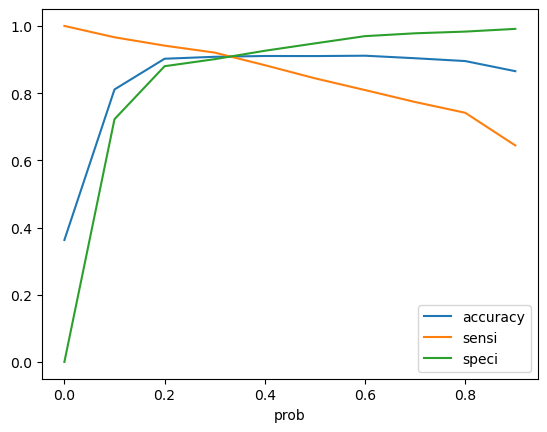

In [186]:
# plotting accuracy sensitivity and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve we get that 0.3 is the optimum point to take as a cutoff probability

In [187]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.935633,1979,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.519975,6249,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.113992,5557,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.003437,7865,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.007735,8491,0,1,0,0,0,0,0,0,0,0,0,0


In [188]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.935633,1979,1,94
1,0,0.519975,6249,1,52
2,0,0.113992,5557,0,11
3,0,0.003437,7865,0,0
4,0,0.007735,8491,0,1


In [189]:
# checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9081325301204819

In [190]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2668,  293],
       [ 134, 1553]], dtype=int64)

In [191]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [192]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.920569057498518

In [193]:
# calculating specificity
TN / float(TN+FP)

0.901046943600135

Our Model seems to be performing well
- ROC Curve: 0.97
- Accuracy: 90.81%
- Sensitivity : 92.05%
- Specificity : 90.10%

In [194]:
# Calculating False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.09895305639986492


In [195]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8412784398699892


In [196]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9521770164168452


In [197]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2668,  293],
       [ 134, 1553]], dtype=int64)

##### Precision

In [198]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8412784398699892

##### Recall

In [199]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.920569057498518

In [200]:
from sklearn.metrics import precision_score, recall_score

In [201]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8412784398699892

In [202]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.920569057498518

In [203]:
from sklearn.metrics import precision_recall_curve

In [204]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

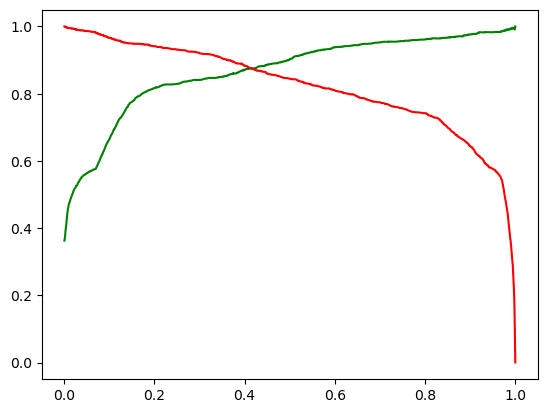

In [205]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [206]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email
8970,-1.144209,-0.560701,-1.266390,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8280,-0.783851,-0.236439,-0.628396,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6941,-0.783851,-1.021301,-1.266390,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7343,4.621518,0.028867,-0.545456,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3734,-0.063135,-0.582810,0.647593,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Notable Activity_SMS Sent,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email
8970,-0.560701,0,1,0,0,1,0,0,0,0
8280,-0.236439,0,0,0,0,0,0,0,0,0
6941,-1.021301,0,0,0,0,1,0,0,0,0
7343,0.028867,0,0,0,0,0,0,0,0,1
3734,-0.582810,0,0,0,0,0,0,0,0,0


In [208]:
X_test_sm = sm.add_constant(X_test)

### Test Set Prediction

In [209]:
y_test_pred = res.predict(X_test_sm)

In [210]:
y_test_pred[:10]

8970    0.002270
8280    0.174495
6941    0.005435
7343    0.948724
3734    0.125653
7889    0.598194
837     0.005358
8227    0.019962
7245    0.999419
8622    0.913947
dtype: float64

In [211]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [212]:
# Let's see the dataframe
y_pred_1.head()

,0
8970,0.002270
8280,0.174495
6941,0.005435
7343,0.948724
3734,0.125653


In [213]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [214]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [215]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [216]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [217]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8970,0.002270
1,0,8280,0.174495
2,0,6941,0.005435
3,0,7343,0.948724
4,0,3734,0.125653


In [218]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [219]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,8970,0.002270
1,0,8280,0.174495
2,0,6941,0.005435
3,0,7343,0.948724
4,0,3734,0.125653


In [220]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [221]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8970,0,0.002270,0
1,8280,0,0.174495,17
2,6941,0,0.005435,1
3,7343,0,0.948724,95
4,3734,0,0.125653,13


In [222]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [223]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8970,0,0.002270,0,0
1,8280,0,0.174495,17,0
2,6941,0,0.005435,1,0
3,7343,0,0.948724,95,1
4,3734,0,0.125653,13,0


In [224]:
# checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9091365461847389

In [225]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1140,  118],
       [  63,  671]], dtype=int64)

In [226]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [227]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9141689373297003

In [228]:
# calculating specificity
TN / float(TN+FP)

0.9062003179650239

In [229]:
# Precision
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8504435994930292

In [230]:
# Recall
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9141689373297003

Observation:
    
After running the model on the Test Data these are the figures we obtain:
    
- Accuracy : 90.92%
    
- Sensitivity : 91.41%
    
- Specificity : 90.62%

#### Final Observation:
    
Comparison of the values obtained for Train & Test datasets:
    

##### Train Data:
    
Accuracy : 90.81%

Sensitivity : 92.05%

Specificity : 90.10%
    
##### Test Data: 
    
Accuracy : 90.92%
    
Sensitivity : 91.41%
    
Specificity : 90.62%
    
#### The Model seems to predict the Conversion rate excellently